In [5]:
# Imports
from pandas import DataFrame, read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.colors import to_rgb

In [6]:
# Data
retribuciones_poblacion: DataFrame = read_excel("./data/retribuciones_alcaldes.xlsx")

dedicacion_exclusia:    DataFrame  = retribuciones_poblacion.query("dedicacion == 'Exclusiva' ")
dedicacion_parcial:     DataFrame  = retribuciones_poblacion.query("dedicacion == 'Parcial' ")
sin_dedicacion:         DataFrame  = retribuciones_poblacion.query("dedicacion == 'Sin dedicación' ")

In [7]:
ccaa:   list[str]   = dedicacion_exclusia["ccaa"].unique()
n_ccaa = len(ccaa)

Text(0.957, -0.42, 'Fuente: INE, ISPA')

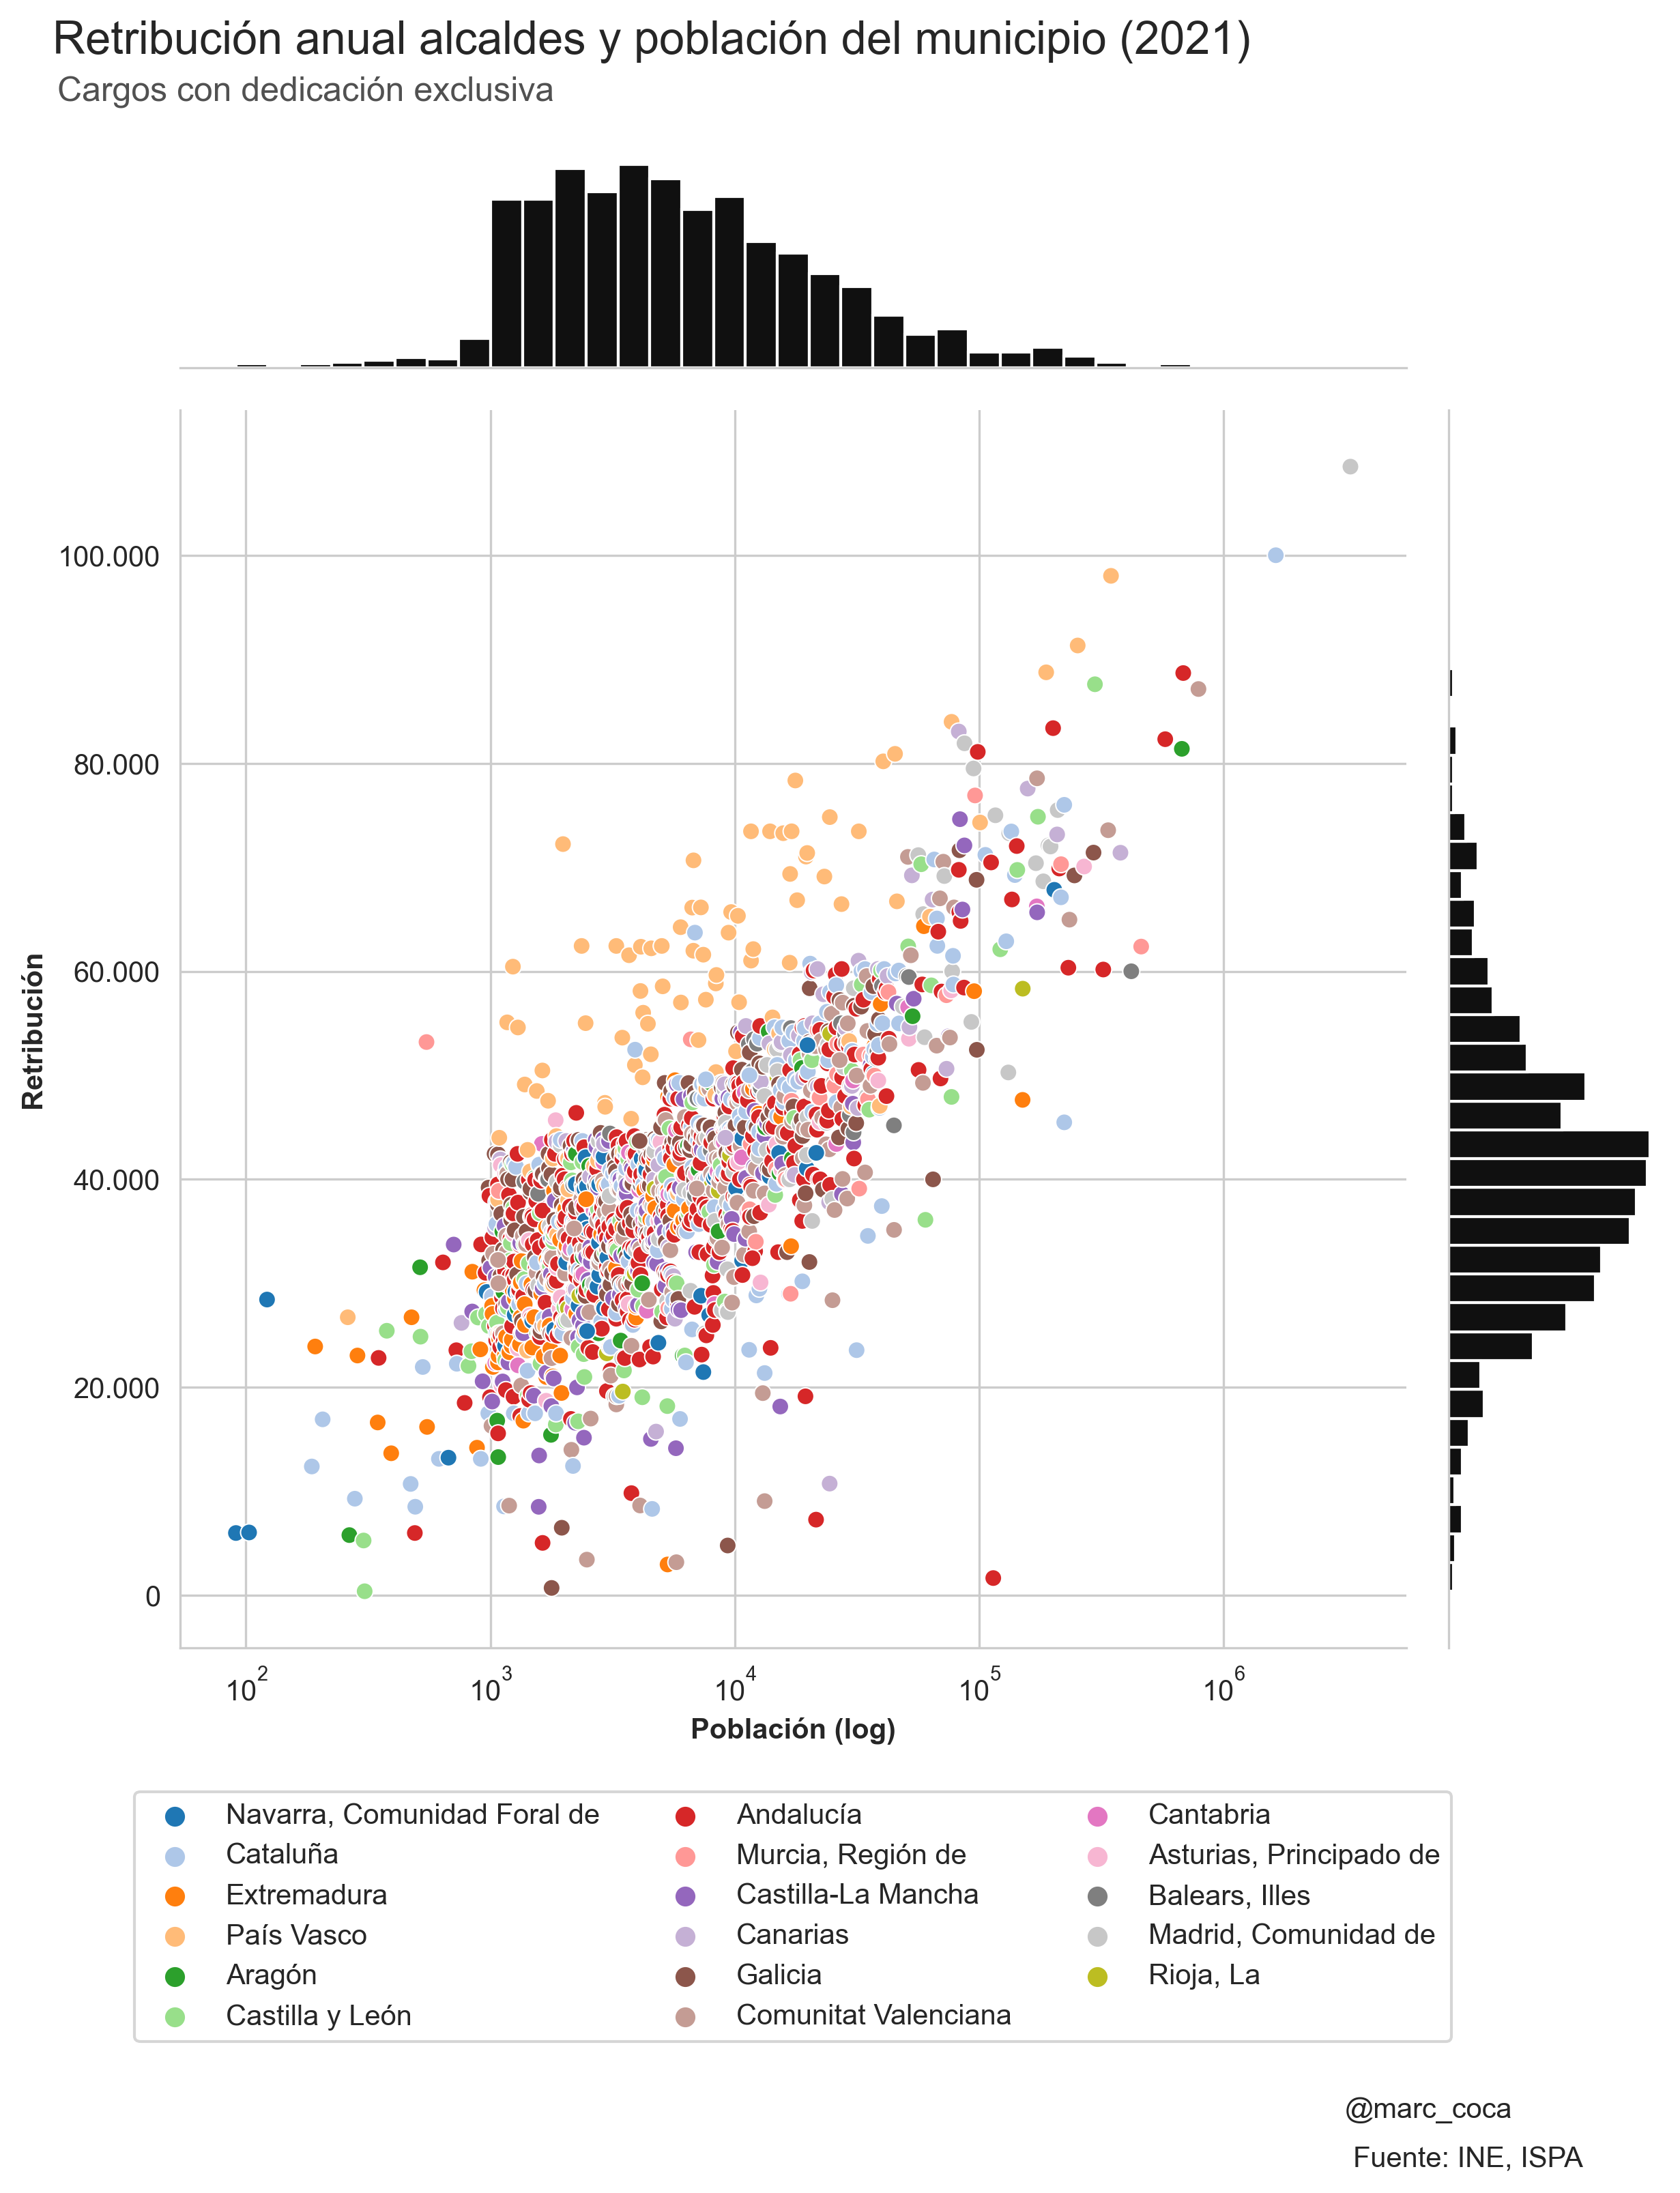

In [8]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

sns.set_style("whitegrid")

palette = sns.color_palette("tab20", n_colors=n_ccaa) 
grafica = sns.JointGrid(x="poblacion", 
                           y="retribucion", 
                           data=dedicacion_exclusia,
                           height=8)


grafica.plot_joint(sns.scatterplot, 
                    hue = dedicacion_exclusia["ccaa"], 
                    palette=palette)

grafica.ax_joint.set_xlabel("Población (log)", fontdict={"weight": "bold"})
grafica.ax_joint.set_ylabel("Retribución", fontdict={"weight": "bold"})
grafica.ax_joint.set_xscale("log")
grafica.ax_joint.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_: '{:,.0f}'.format(x).replace(',', '.')))

grafica.plot_marginals(sns.histplot, color='black', fill=True, edgecolor='white')
grafica.plot_marginals(sns.histplot, color='black', fill=True, edgecolor='white')

grafica.ax_marg_x.grid(False)
grafica.ax_marg_y.grid(False)

grafica.ax_joint.legend(bbox_to_anchor=(0.5, -0.33), loc='lower center', ncol = 3)

grafica.fig.suptitle('Retribución anual alcaldes y población del municipio (2021)', fontsize=16, y=1.05, x = 0, ha='left', va="center")
grafica.ax_joint.text(-0.1, 
                      1.25, 
                      'Cargos con dedicación exclusiva',
                      transform=grafica.ax_joint.transAxes, 
                      fontdict={
                          'fontsize': 12, 
                          'ha': 'left', 
                          'alpha': 0.8})

grafica.ax_joint.text(0.95, -0.38, "@marc_coca", fontsize=10, ha='left', transform=grafica.ax_joint.transAxes)
grafica.ax_joint.text(0.957, -0.42, "Fuente: INE, ISPA", fontsize=10, ha='left', transform=grafica.ax_joint.transAxes)


Text(0.83, 0.22, 'Fuente: INE, ISPA')

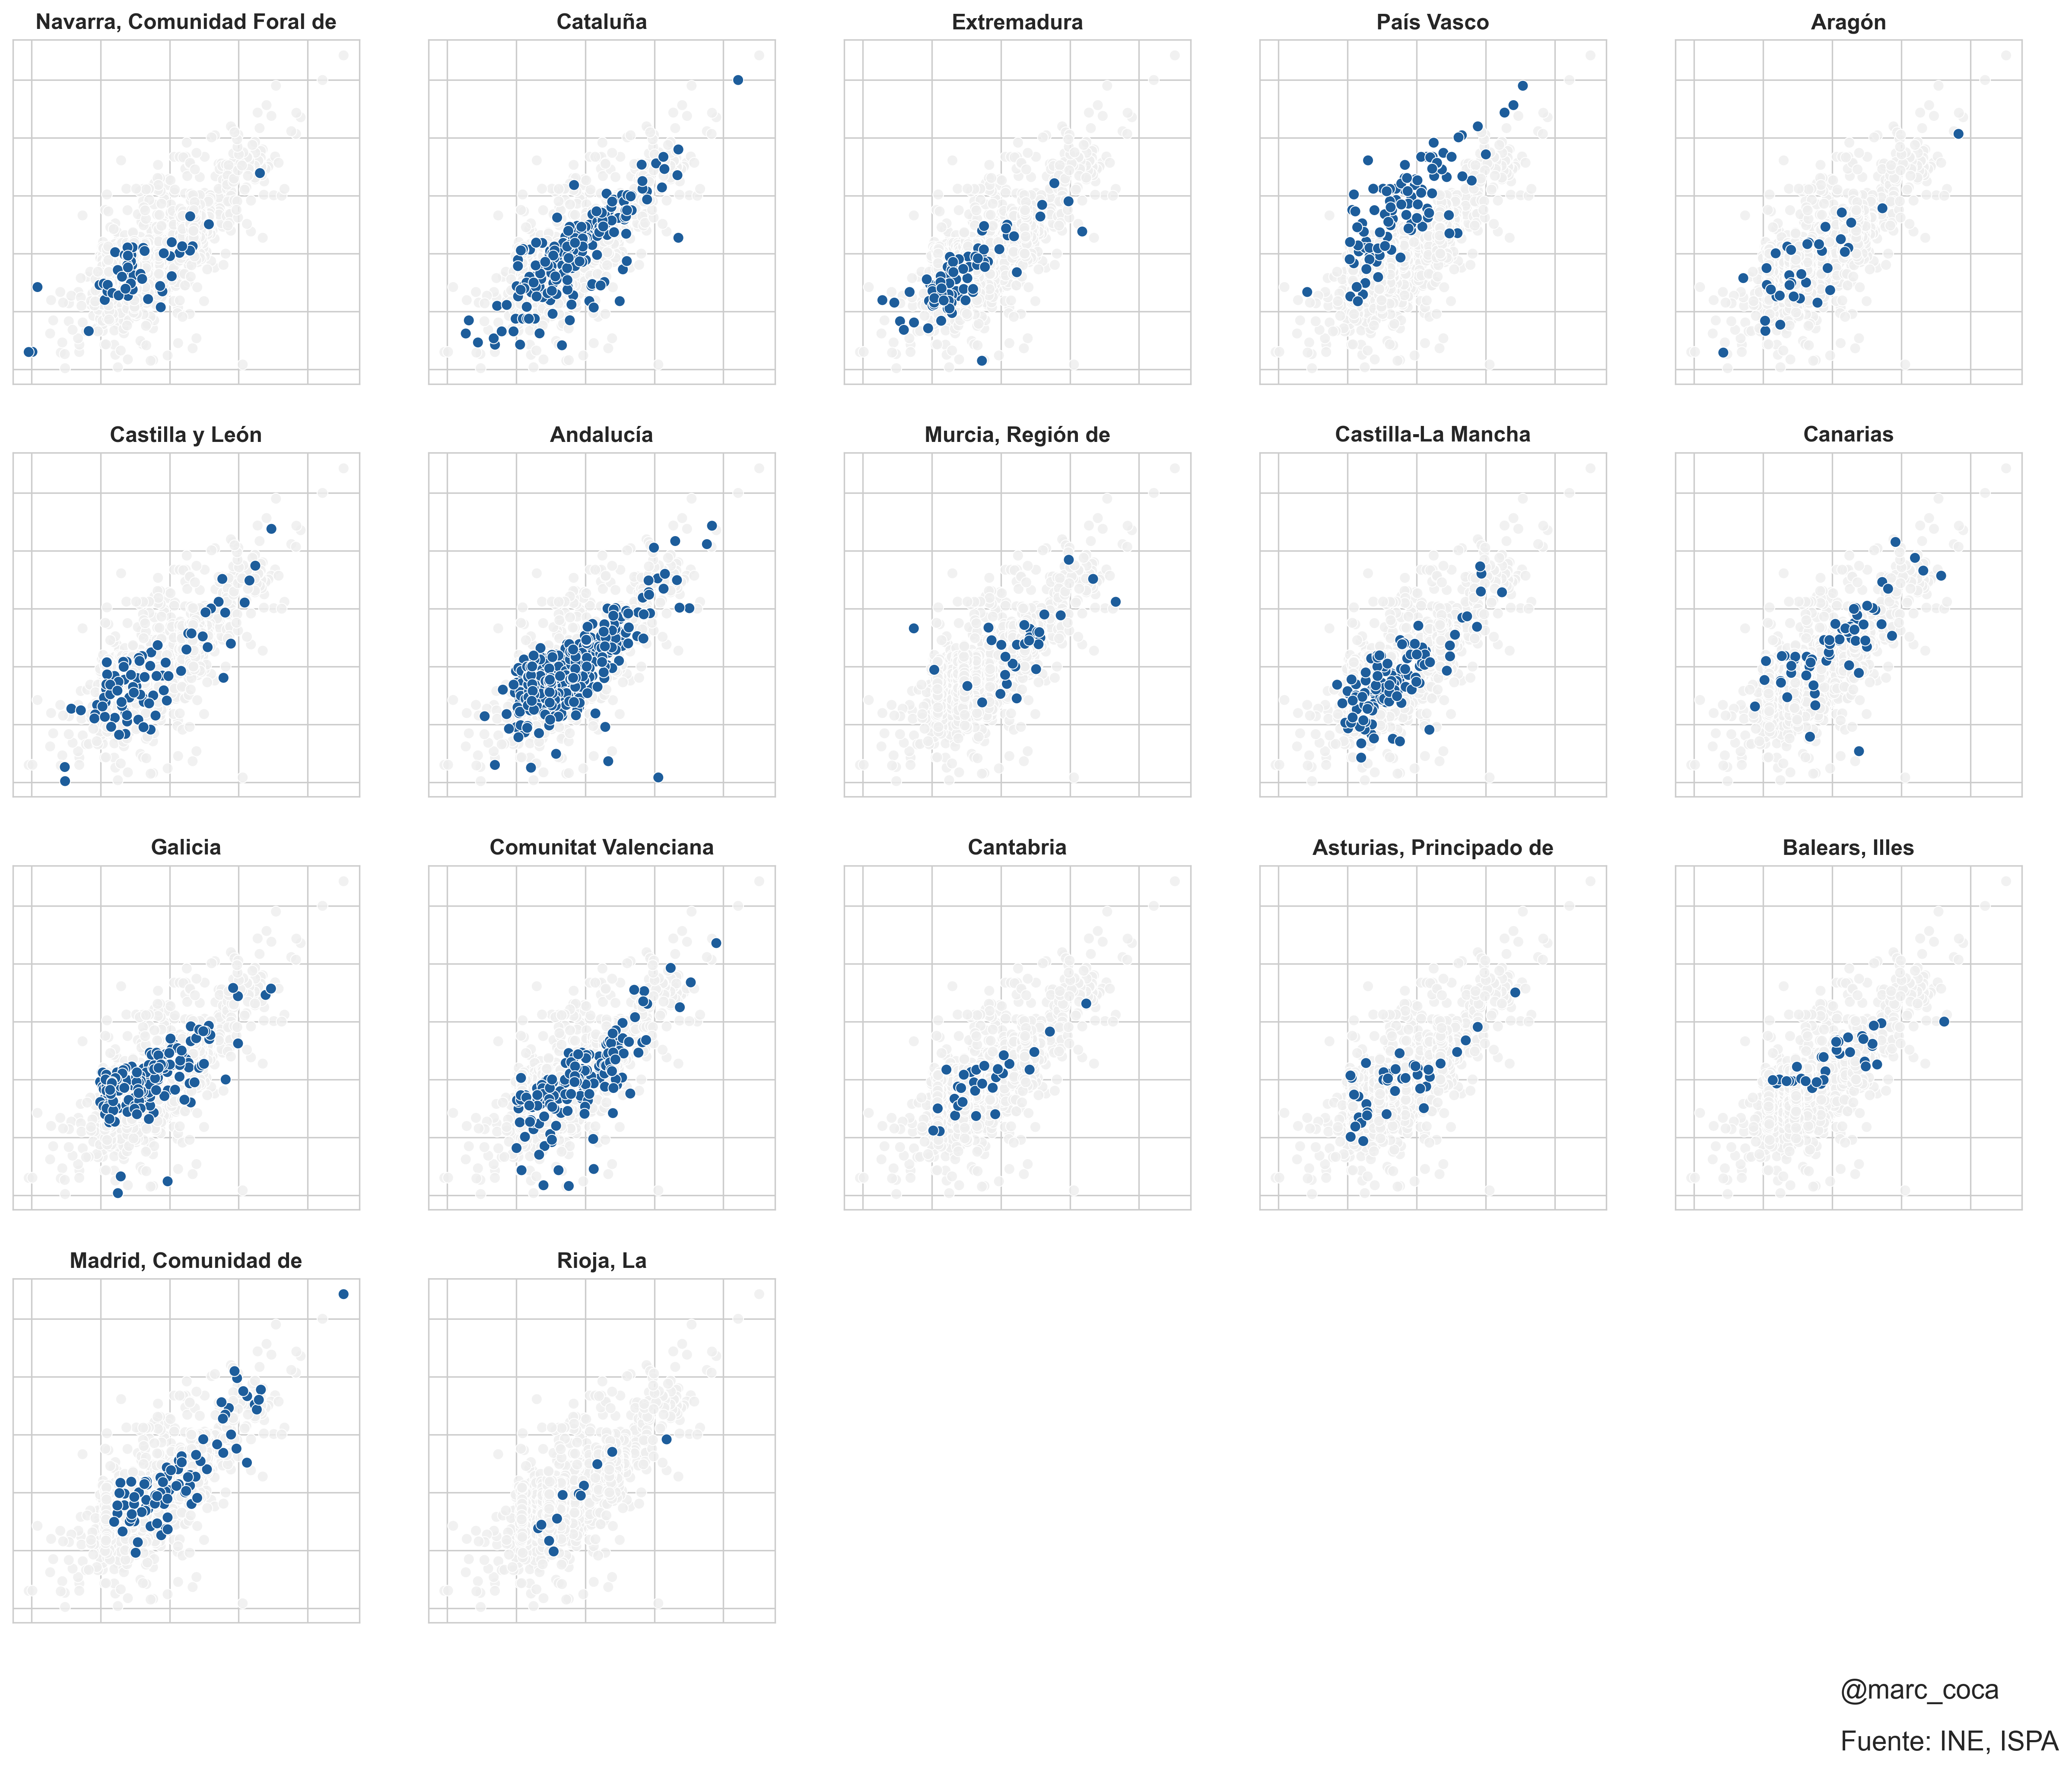

In [9]:
grafica = plt.figure(figsize=(20,20))

for index, ca in enumerate(ccaa):
    
    ca_data = dedicacion_exclusia.copy()
    ca_data["ccaa"] = np.where(ca_data["ccaa"] == ca, ca_data["ccaa"], "Otras CCAA")
    ca_data["order"] = ca_data['ccaa'].apply(lambda x: x == ca)
    ca_data = ca_data.sort_values(by="order")

    ax = grafica.add_subplot(5,5,index+1)

    custom_palette = {ca: to_rgb("#1D5D9B") + (1,), 'Otras CCAA': to_rgb("#EEEEEE") + (0.8,)}

    scatter = sns.scatterplot(x = "poblacion",
                              y = "retribucion",
                              data = ca_data,
                              hue = "ccaa",
                              legend=False,
                              palette=custom_palette,
                              ax=ax)
    
    ax.set_xscale("log")
    ax.set_title(ca, 
                 fontdict={
                     "fontsize": 12,
                     "weight": "bold"
                 })
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xlabel("")
    ax.set_ylabel("")

grafica.text(0.83, 0.24, "@marc_coca", fontsize=15, ha='left')
grafica.text(0.83, 0.22, "Fuente: INE, ISPA", fontsize=15, ha='left')